Heart Disease Prediction Project

This project aims to predict the likelihood of heart disease in patients using machine learning algorithms such as Logistic Regression, 
Decision Tree, and Random Forest. The workflow includes data preprocessing, exploratory data analysis, feature engineering, 
model training, hyperparameter tuning, and performance evaluation using metrics like accuracy, precision, recall, and F1-score.
Visualizations and correlation studies are employed to derive meaningful insights and optimize model performance.


In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve, precision_score, recall_score, f1_score



In [3]:

data = pd.read_csv('heart.csv')  
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Splitting Data into Features and Target Variable

The independent variables (features) are separated from the target variable ('target'). 
The dataset is then split into training and testing sets with 80% for training and 20% for testing.


In [4]:
# from sklearn.preprocessing import StandardScaler
x=data.drop(columns=['target'])
y=data.drop(columns=[ col for col in data.columns if col not in['target']])
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#Feature Correlation Heatmap



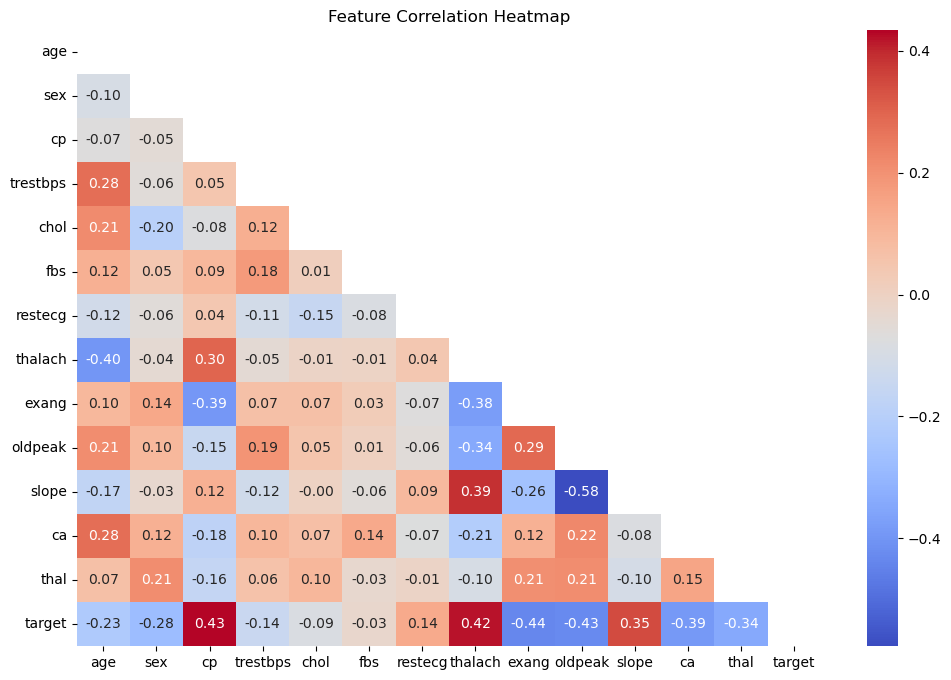

In [5]:

# 2. Correlation Heatmap
plt.figure(figsize=(12, 8))
mask = np.triu(np.ones_like(data.corr(), dtype=bool))
sns.heatmap(data.corr(), mask=mask, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()



This heatmap visualizes the correlation between features in the dataset. 
It highlights relationships, helping identify multicollinearity or feature importance.
A mask is applied to display only the upper triangle for better clarity.

##Age Distribution by Target


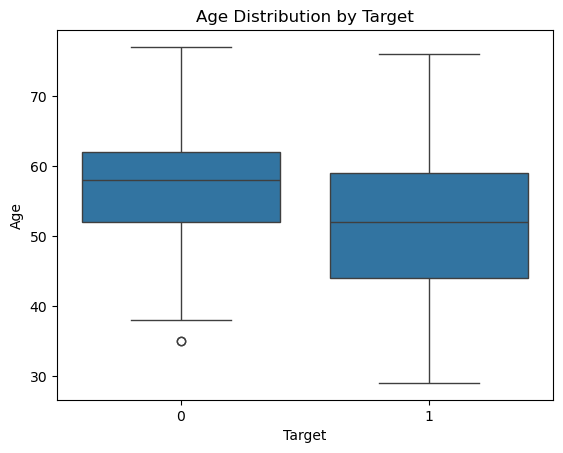

In [6]:
sns.boxplot(x='target', y='age', data=data)
plt.title("Age Distribution by Target")
plt.xlabel("Target")
plt.ylabel("Age")
plt.show()


This boxplot shows the distribution of age for each class of the target variable.
It helps in analyzing the relationship between age and the likelihood of heart disease.

##Standardizing Features

StandardScaler is applied to scale the features to have zero mean and unit variance.


In [7]:

scaler = StandardScaler()
x_train_st = scaler.fit_transform(x_train)
x_test_st=scaler.transform(x_test)

# Model Training and Probability Predictions

Three models are trained on the standardized training dataset:
1. Logistic Regression
2. Decision Tree Classifier
3. Random Forest Classifier

After training, prediction probabilities for the test dataset are obtained
using each model. These probabilities will be used for evaluation metrics 
such as ROC-AUC and for further analysis.


In [8]:

log_reg = LogisticRegression()
dt = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(random_state=42)

# Training models
log_reg.fit(x_train_st, y_train)
dt.fit(x_train_st, y_train)
rf.fit(x_train_st, y_train)

# Predictions
log_reg_probs = log_reg.predict_proba(x_test_st)[:, 1]
dt_probs = dt.predict_proba(x_test_st)[:, 1]
rf_probs = rf.predict_proba(x_test_st)[:, 1]

C:\Users\kanna\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kanna\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


## Model Performance Evaluation and Visualization

1. Computing  the ROC-AUC score for each model to evaluate their ability to 
   distinguish between classes effectively.
2. Visualizing the performance of Logistic Regression, Decision Tree, and 
   Random Forest classifiers using a bar chart. The AUC (Area Under the Curve) 
   values provide a summary of each model's classification capability, where 
   higher values indicate better performance.


C:\Users\kanna\AppData\Local\Temp\ipykernel_12432\1598834701.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(model_performance.keys()), y=list(model_performance.values()), palette="magma")


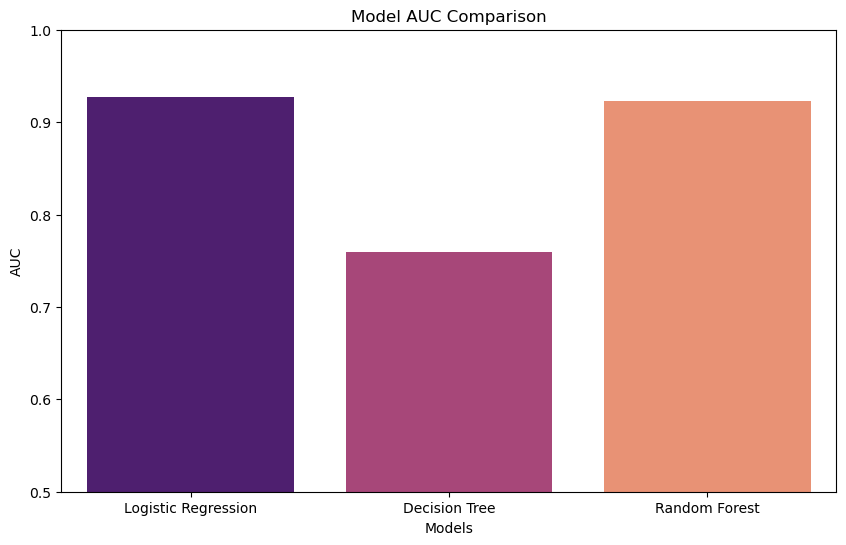

In [9]:

# ROC AUC Score
log_reg_auc = roc_auc_score(y_test, log_reg_probs)
dt_auc = roc_auc_score(y_test, dt_probs)
rf_auc = roc_auc_score(y_test, rf_probs)

# 4. Model Comparison Chart
model_performance = {'Logistic Regression': log_reg_auc, 'Decision Tree': dt_auc, 'Random Forest': rf_auc}
plt.figure(figsize=(10, 6))
sns.barplot(x=list(model_performance.keys()), y=list(model_performance.values()), palette="magma")
plt.title("Model AUC Comparison")
plt.xlabel("Models")
plt.ylabel("AUC")
plt.ylim(0.5, 1.0)
plt.show()


## ROC Curve Visualization

Plotting  the ROC (Receiver Operating Characteristic) curve for Logistic Regression, 
Decision Tree, and Random Forest models. The ROC curve illustrates the trade-off 
between True Positive Rate (TPR) and False Positive Rate (FPR) across various thresholds. 
higher AUC indicates  better discriminative ability.


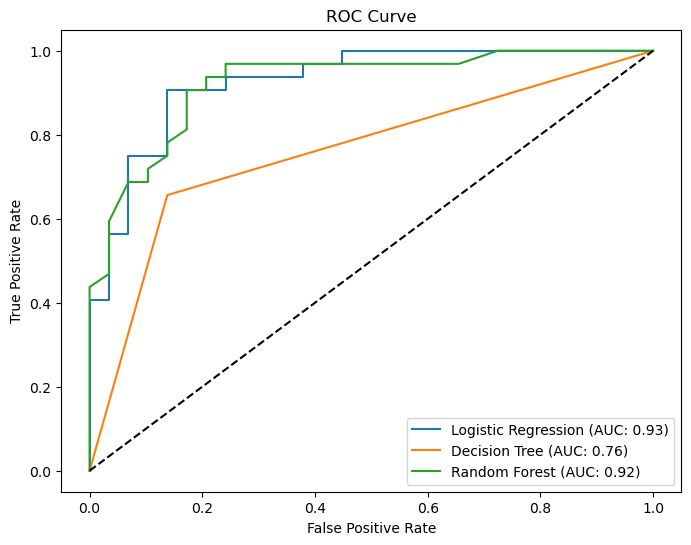

In [10]:

# ROC Curve
plt.figure(figsize=(8, 6))
for name, probs in zip(['Logistic Regression', 'Decision Tree', 'Random Forest'], [log_reg_probs, dt_probs, rf_probs]):
    fpr, tpr, _ = roc_curve(y_test, probs)
    plt.plot(fpr, tpr, label=f"{name} (AUC: {model_performance[name]:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

## Precision-Recall Curve Visualization

Ploting the Precision-Recall curves for Logistic Regression, Decision Tree, 
and Random Forest models. These curves highlight the trade-off between 
precision and recall across different thresholds, offering insights into 
model performance


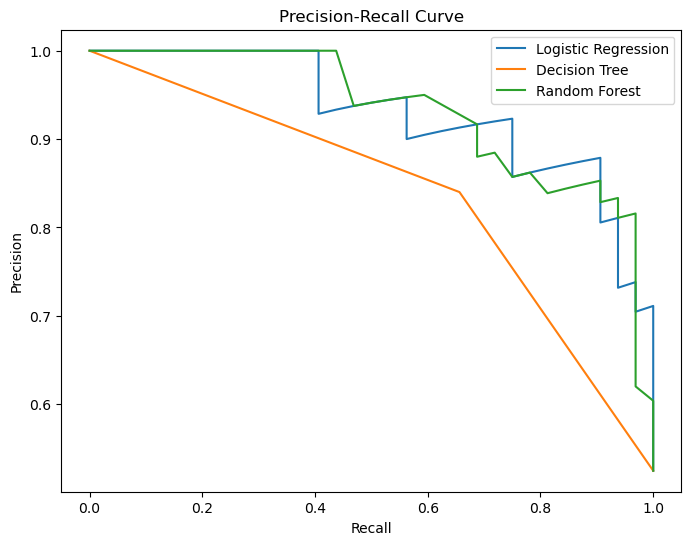

In [11]:

plt.figure(figsize=(8, 6))
for name, probs in zip(['Logistic Regression', 'Decision Tree', 'Random Forest'], [log_reg_probs, dt_probs, rf_probs]):
    precision, recall, _ = precision_recall_curve(y_test, probs)
    plt.plot(recall, precision, label=f"{name}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.show()

## Confusion Matrix Plotting Function

This function generates confusion matrices for a given model, 
showcasing the classification performance by comparing actual and predicted labels. 
The heatmap provides a visual representation of True Positives, True Negatives, 
False Positives, and False Negatives. 


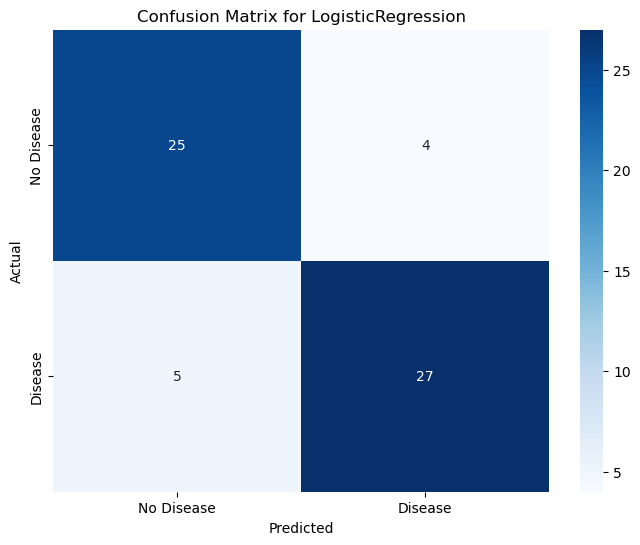

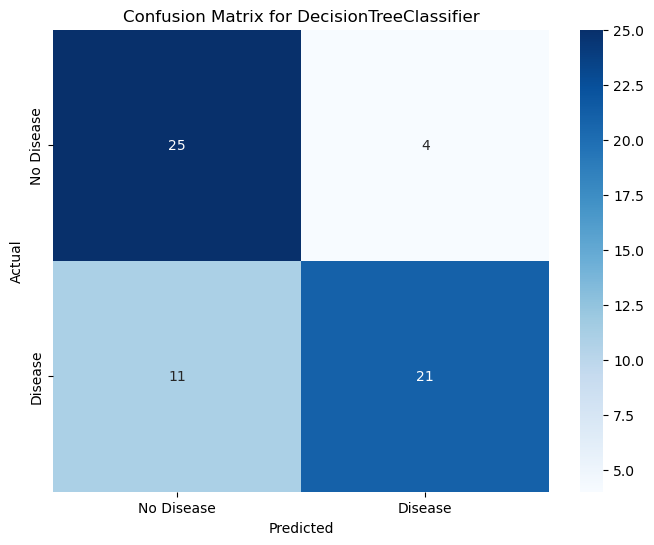

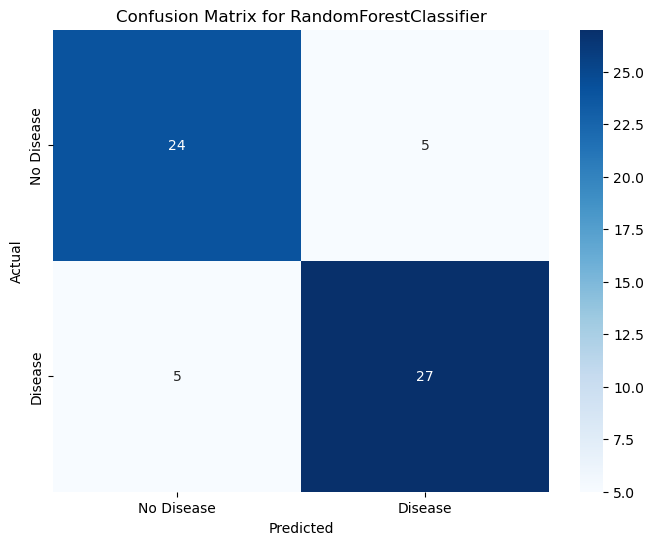

In [12]:

def plot_confusion_matrix(model, x_test_st, y_test, threshold=0.5):
    y_pred_prob = model.predict_proba(x_test_st)[:, 1]
    y_pred = (y_pred_prob >= threshold).astype(int)
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["No Disease", "Disease"], yticklabels=["No Disease", "Disease"])
    plt.title(f"Confusion Matrix for {type(model).__name__}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()



plot_confusion_matrix(log_reg, x_test_st, y_test)
plot_confusion_matrix(dt, x_test_st, y_test)
plot_confusion_matrix(rf, x_test_st, y_test)


Insights: for logistic regression
The model has high recall (86%), effectively identifying individuals with heart disease.
However, the low precision (48%) and specificity (16%) indicate a high false-positive rate,
requiring improvements to reduce misclassifications of healthy individuals.

## Confusion Matrix with Optimal Threshold

This function calculates the confusion matrix for a given model using the optimal threshold.
The optimal threshold is determined by maximizing the difference between True Positive Rate (TPR) 
and False Positive Rate (FPR) from the ROC curve. This threshold balances sensitivity and specificity.
The confusion matrix visualizes the classification results, highlighting True Positives, 
True Negatives, False Positives, and False Negatives.



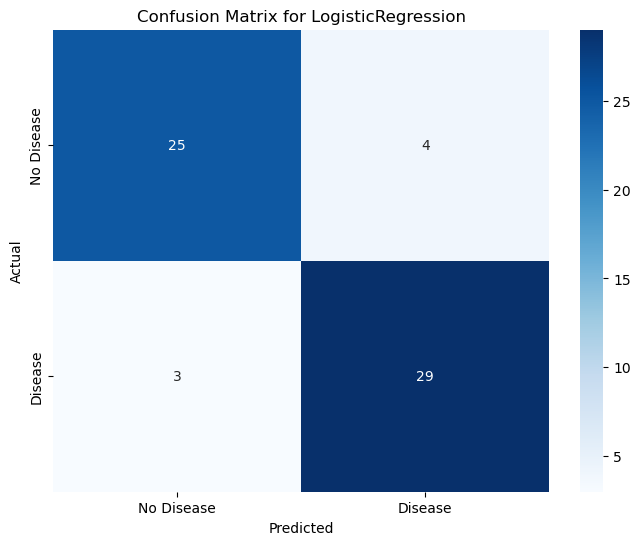

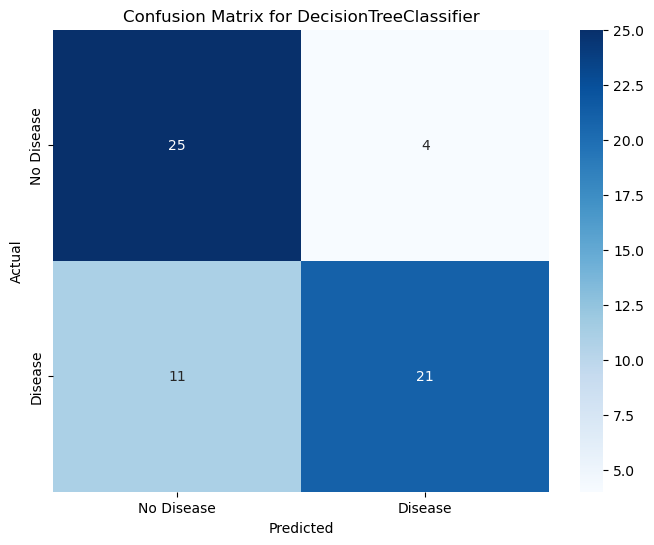

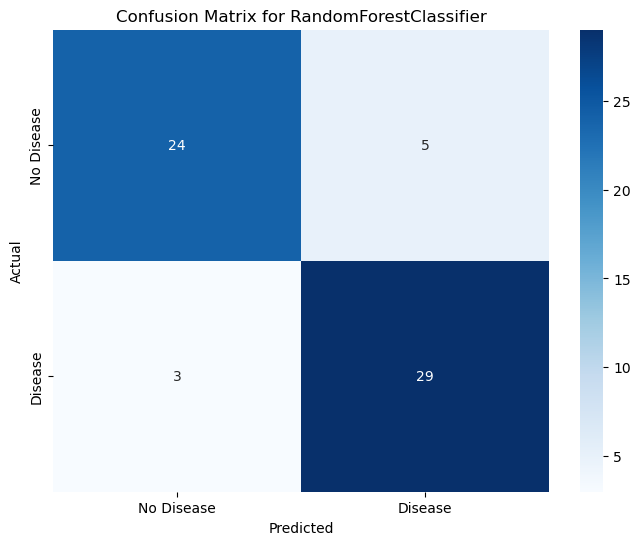

In [13]:

def plot_confusion_matrix(model, x_test_st, y_test):
    y_scores = model.predict_proba(x_test_st)[:, 1]
    fpr,tpr,thresholds=roc_curve(y_test,y_scores)
    best_threshold_index=np.argmax(tpr-fpr)
    best_threshold=thresholds[best_threshold_index]
    y_pred_optimal = (y_scores >=best_threshold).astype(int)
    cm = confusion_matrix(y_test, y_pred_optimal)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["No Disease", "Disease"], yticklabels=["No Disease", "Disease"])
    plt.title(f"Confusion Matrix for {type(model).__name__}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

plot_confusion_matrix(log_reg, x_test_st, y_test)
plot_confusion_matrix(dt, x_test_st, y_test)
plot_confusion_matrix(rf, x_test_st, y_test)

Insights: for logistic regression The model has high recall (86%), 
effectively identifying individuals with heart disease.
Additionally, it has improved specificity (91%) and precision (89%), minimizing false positives.
Overall, the model demonstrates balanced and reliable performance.

## Accuracy Comparison: Default vs. Optimal Threshold

This section calculates and compares the model's accuracy using:
1. The default threshold of 0.5.
2. The optimal threshold, determined by maximizing the difference (TPR - FPR) from the ROC curve.

- Predictions are made using both thresholds.
- Accuracy is calculated for both cases to evaluate the improvement achieved 
  by using the optimal threshold for better classification balance.


In [14]:
from sklearn.metrics import accuracy_score
y_pred=log_reg.predict(x_test_st)
y_scores=log_reg.predict_proba(x_test_st)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_scores)
best_threshold_index=np.argmax(tpr-fpr)
best_threshold=thresholds[best_threshold_index]
y_pred_optimal=(y_scores>=best_threshold).astype(int)
acc_before_optimal_thr=accuracy_score(y_test,y_pred)
acc_after_optimal_thr=accuracy_score(y_test,y_pred_optimal)
print(f'accuracy with default threshold of 0.5 is {acc_before_optimal_thr}')
print(f'accuracy with optimal threshold of {best_threshold:.2f} is {acc_after_optimal_thr}')

accuracy with default threshold of 0.5 is 0.8524590163934426
accuracy with optimal threshold of 0.45 is 0.8852459016393442


there is an  increase in  the accuracy by optimal threshold for logistic regression

## Logistic Regression with ElasticNet Regularization

A Logistic Regression model is trained using ElasticNet regularization, which combines 
both L1 (Lasso) and L2 (Ridge) penalties to balance feature selection and shrinkage.
The `l1_ratio=0.8` indicates 80% L1 regularization and 20% L2 regularization.


In [33]:
log_reg_elasticnet=LogisticRegression(penalty='elasticnet',solver='saga',l1_ratio=0.8)
log_reg_elasticnet.fit(x_train_st,y_train)
y_pred_elasticnet=log_reg_elasticnet.predict(x_test_st)
accuracy_score(y_test,y_pred_elasticnet)

C:\Users\kanna\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8688524590163934

accuracy has been increased by changing the penalty to elasticnet with more ratio to l1(lasso regularization) (0.8)
but at the cost of increased overfitting when compared to model log_reg with penalty termof l2(ridge regulrization)






### Logistic Regression with ElasticNet: Accuracy with Optimal Threshold

This section evaluates the Logistic Regression model trained with ElasticNet regularization 
(L1 ratio = 0.8). The optimal threshold is determined by maximizing the difference (TPR - FPR) 
from the ROC curve.


In [34]:

y_scores_elasticnet=log_reg_elasticnet.predict_proba(x_test_st)[:,1]
fpr_elasticnet,tpr_elasticnet,thresholds_elasticnet=roc_curve(y_test,y_scores_elasticnet)
best_threshold_index_elasticnet=np.argmax(tpr_elasticnet-fpr_elasticnet)
best_threshold_elasticnet=thresholds_elasticnet[best_threshold_index_elasticnet]
y_pred_optimal_elasticnet=(y_scores_elasticnet>=best_threshold_elasticnet).astype(int)
acc_log_reg_elasticnet=accuracy_score(y_test,y_pred_optimal_elasticnet)
print(f'accuracy score for logistic regression model with penalty term as elasticnet with l1 ratio of 0.8 is {acc_log_reg_elasticnet}')

accuracy score for logistic regression model with penalty term as elasticnet with l1 ratio of 0.8 is 0.8852459016393442


### Confusion Matrix for Logistic Regression with ElasticNet

visualizes the confusion matrix for the Logistic Regression model 
trained with ElasticNet regularization (L1 ratio = 0.8). 

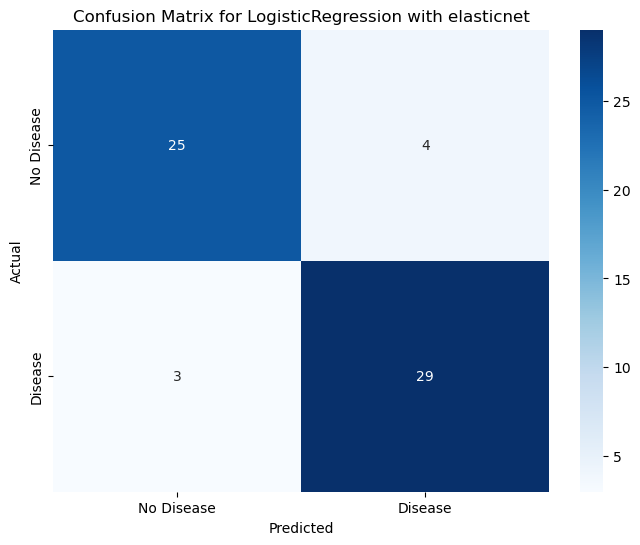

In [36]:
cm = confusion_matrix(y_test, y_pred_optimal_elasticnet)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["No Disease", "Disease"], yticklabels=["No Disease", "Disease"])
plt.title(f"Confusion Matrix for {type(log_reg_elasticnet).__name__} with elasticnet")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()    


confusion matrix is same as confusion matrix from penalty as l2 regularization

##AUC Comparison: Logistic Regression Models

 compares the performance of two Logistic Regression models:
1. Logistic Regression with L2 regularization (default penalty).
2. Logistic Regression with ElasticNet regularization (L1 ratio = 0.8).

The AUC (Area Under the ROC Curve) scores are calculated for both models, 
highlighting their ability to distinguish between the positive and negative classes. 


## AUC Comparison: Logistic Regression Models

This section compares the performance of two Logistic Regression models:
1. Logistic Regression with L2 regularization (default penalty).
2. Logistic Regression with ElasticNet regularization (L1 ratio = 0.8).

The AUC (Area Under the ROC Curve) scores are calculated for both models, 
highlighting their ability to distinguish between the positive and negative classes. 
A bar chart is used to visually compare their AUC values, where higher scores 
indicate better classification performance.


C:\Users\kanna\AppData\Local\Temp\ipykernel_12432\1249173408.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(model_performance.keys()), y=list(model_performance.values()), palette="magma")


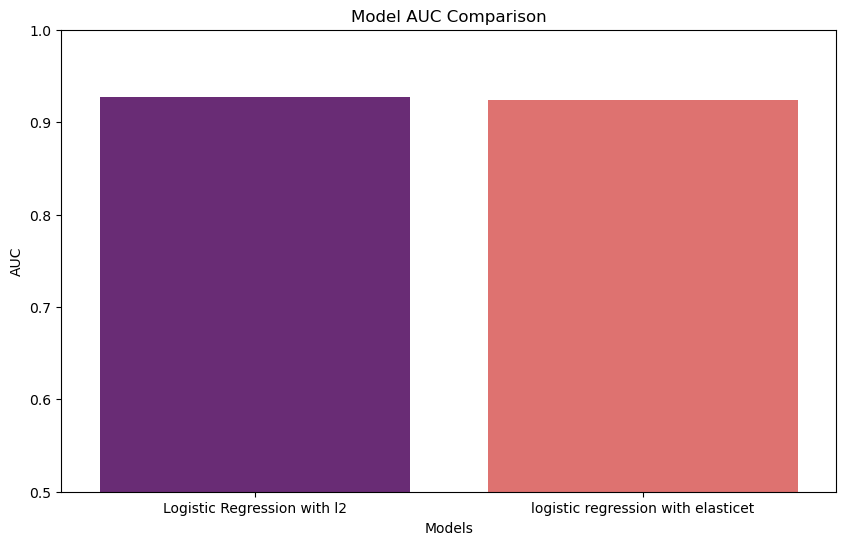

In [37]:
log_reg_probs = log_reg.predict_proba(x_test_st)[:, 1]
log_reg_elasticnet_probs=log_reg_elasticnet.predict_proba(x_test_st)[:,1]

log_reg_auc = roc_auc_score(y_test, log_reg_probs)
log_reg_elasticnet_auc=roc_auc_score(y_test,log_reg_elasticnet_probs)

model_performance = {'Logistic Regression with l2': log_reg_auc, 'logistic regression with elasticet': log_reg_elasticnet_auc}
plt.figure(figsize=(10, 6))
sns.barplot(x=list(model_performance.keys()), y=list(model_performance.values()), palette="magma")
plt.title("Model AUC Comparison")
plt.xlabel("Models")
plt.ylabel("AUC")
plt.ylim(0.5, 1.0)
plt.show()


### ROC Curve with Threshold Annotations

This section plots the ROC curves for two Logistic Regression models:
1. Logistic Regression with L2 regularization.
2. Logistic Regression with ElasticNet regularization (L1 ratio = 0.8).

The ROC curves illustrate the trade-off between True Positive Rate (TPR) and False Positive Rate (FPR),
with the AUC (Area Under the Curve) .
Threshold values are annotated at selected points along the curve to provide insights into
how different thresholds affect the model's performance.


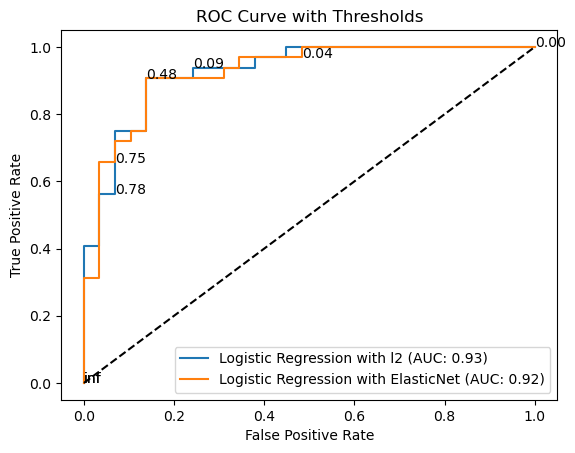

In [38]:
from sklearn.metrics import  auc
# Assuming you have y_test and predicted probabilities for both models
for name, probs in zip(['Logistic Regression with l2', 'Logistic Regression with ElasticNet'], [log_reg_probs, log_reg_elasticnet_probs]):
    fpr, tpr, thresholds = roc_curve(y_test, probs)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (AUC: {roc_auc:.2f})")
    
    # Annotate with threshold values at selected points
    for i in range(len(thresholds)):
        if (i % 5 == 0) :  # Adjust the step to show fewer or more thresholds
            plt.annotate(f'{thresholds[i]:.2f}', (fpr[i], tpr[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve with Thresholds")
plt.legend(loc="lower right")
plt.show()


Insights from the ROC Curve:
- The Logistic Regression model with L2 regularization achieved a higher AUC score (0.93),
  indicating superior performance in distinguishing between classes compared to the ElasticNet model (AUC: 0.92).
- Threshold analysis shows optimal trade-offs between True Positive Rate (TPR) and False Positive Rate (FPR) 
  at various decision points, helping refine the threshold for practical applications.
- Both models demonstrate strong classification capability, with the L2-regularized model slightly outperforming.

Insights at threshold 0.48:
- At a decision threshold of 0.48, the model achieves a balance between TPR and FPR,
  aiming to maximize true positives while keeping false positives reasonably low.
- This threshold can be used to adjust the model's sensitivity based on the application needs.
- Further evaluation of precision, recall, and F1-score at this threshold can guide its practical usage.






##  Model Evaluation: Precision, Recall, and F1-Score
The following code calculates the Confusion Matrix, Precision, Recall, F1-Score, and Accuracy for the trained model.


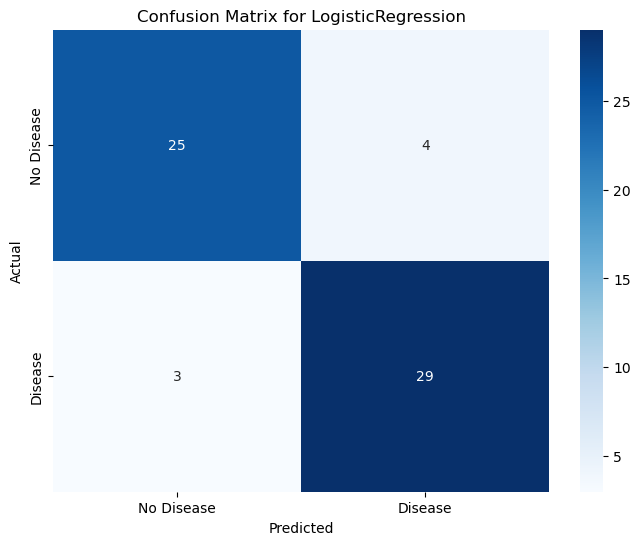

Precision: 0.8788
Recall: 0.9062
F1-Score: 0.8923


0.8852459016393442

In [42]:
plot_confusion_matrix(log_reg, x_test_st, y_test)

precision = precision_score(y_test, y_pred_optimal)
recall = recall_score(y_test, y_pred_optimal)
f1 = f1_score(y_test, y_pred_optimal)


print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
accuracy_score(y_test,y_pred_optimal)